<a href="https://colab.research.google.com/github/ishaak15/UNSW-IDS-Feature-Selection/blob/main/Copy_of_Training_and_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import os
import math
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn import datasets, preprocessing, feature_extraction, neighbors
from sklearn import linear_model, svm, metrics, ensemble, tree, ensemble
from sklearn.model_selection import train_test_split
from copy import copy
import urllib
import csv

import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC # "Support Vector Classifier" 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from zipfile import ZipFile
import collections

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



In [ ]:
!git clone https://github.com/ishaak15/UNSW-IDS-Feature-Selection.git

Cloning into 'UNSW-IDS-Feature-Selection'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 64 (delta 9), reused 0 (delta 0), pack-reused 37
Unpacking objects: 100% (64/64), done.


In [ ]:
cd UNSW-IDS-Feature-Selection/

/content/UNSW-IDS-Feature-Selection


In [ ]:
ls

bayes_10.sav   clfKNN20.sav                        README.md
bayes_20.sav   clfKNN_all.sav                      Testset1.csv
bayes_all.sav  Copy_of_Training_and_Testing.ipynb  Testset2.csv
clfDT_10.sav   Dataset1.csv                        Testset3.csv
clfDT_20.sav   Dataset2.csv                        Training_and_Testing.ipynb
clfDT_all.sav  Dataset3.csv                        UNSW_IDS_analysis.ipynb
clfKNN10.sav   LICENSE                             UNSW_NB15_testing-set.csv


In [ ]:
df1 = pd.read_csv('Dataset1.csv',index_col=0)
df2 = pd.read_csv('Dataset2.csv',index_col=0)
df3 = pd.read_csv('Dataset3.csv',index_col=0)

In [ ]:
tf1 = pd.read_csv('Testset1.csv',index_col=0)
tf2 = pd.read_csv('Testset2.csv',index_col=0)
tf3 = pd.read_csv('Testset3.csv',index_col=0)

In [ ]:
df1_xtrain=df1.iloc[: , :-1]
df1_ytrain=df1.iloc[:,-1]
df2_xtrain=df2.iloc[: , :-1]
df2_ytrain=df2.iloc[:,-1]
df3_xtrain=df3.iloc[: , :-1]
df3_ytrain=df3.iloc[:,-1]

In [ ]:
df1_xtest=tf1.iloc[: , :-1]
df1_ytest=tf1.iloc[:,-1]
df2_xtest=tf2.iloc[: , :-1]
df2_ytest=tf2.iloc[:,-1]
df3_xtest=tf3.iloc[: , :-1]
df3_ytest=tf3.iloc[:,-1]

In [ ]:
#KNN

In [ ]:
clfKNN10=neighbors.KNeighborsClassifier()
clfKNN10.fit(df1_xtrain,df1_ytrain)
#clfKNN10.fit(df1_xtrain,df1_ytrain)

print ("\t\tKNN Classification of UNSW-NB15\n\n\t\tTop 10 Features ")

yt_pred_10 = clfKNN10.predict(df1_xtest)
results = confusion_matrix(df1_ytest, yt_pred_10) 
print ('Confusion Matrix :')
print(results) 


accKNN10=accuracy_score(df1_ytest,yt_pred_10)
print("Accuracy: ",accKNN10)
preKNN10=precision_score(df1_ytest, yt_pred_10, average='macro')
print("Precision Score: ",preKNN10)
f1KNN10=f1_score(df1_ytest, yt_pred_10, average='macro')
print("F1 Score: ",f1KNN10)
reKNN10=recall_score(df1_ytest, yt_pred_10, average='macro')  
print("Recall: ",reKNN10)

		KNN Classification of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[  208   131    42    58   129    16    32    61     0     0]
 [  198   121    13    49   134    18    16    33     1     0]
 [  822   758   472   913   502    21   202   372    27     0]
 [  955   835   503  6664   944    39   616   540    33     3]
 [  444   315    97   469  3357    54  1111   164    50     1]
 [   17    11    34   375   168 18078   140    44     4     0]
 [  496    52   218  1986  7076    20 26822   233    93     4]
 [   82   102    51   324   117     5    71  2737     5     2]
 [    5     7    12    50   161     6    51    32    54     0]
 [    0     1     2    26    11     0     3     0     0     1]]
Accuracy:  0.7107078657144246
Precision Score:  0.41756373950870634
F1 Score:  0.4023931552335053
Recall:  0.44140047486900985


In [ ]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df2_xtrain,df2_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

y_pred_20 = clfKNN20.predict(df2_xtest)
results = confusion_matrix(df2_ytest, y_pred_20) 
print ('Confusion Matrix :')
print(results) 


accKNN20=accuracy_score(df2_ytest,y_pred_20)
print("Accuracy: ",accKNN20)
preKNN20=precision_score(df2_ytest, y_pred_20, average='macro')
print("Precision Score: ",preKNN20)
f1KNN20=f1_score(df2_ytest, y_pred_20, average='macro')
print("F1 Score: ",f1KNN20)
reKNN20=recall_score(df2_ytest, y_pred_20, average='macro')  
print("Recall: ",reKNN20)

		KNN Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[  267   167    15    69   117    16    17     9     0     0]
 [  251   109     6    65   118    18    11     5     0     0]
 [ 1150  1136   184   646   494    22   307   129    21     0]
 [ 1321  1139   396  4316  1854    39  1749   290    28     0]
 [  599   332   140  2053  1702    56  1023   122    35     0]
 [   30    22    26   304   220 18083   132    51     3     0]
 [  132    71   537  7955  4981    21 22760   473    69     1]
 [  126   152    91   985   400     7   405  1325     5     0]
 [    7     6    13   109   126     5    52    17    43     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5925885439440315
Precision Score:  0.3273066113090913
F1 Score:  0.3053129978339978
Recall:  0.336096541715301


In [ ]:
clfKNN20=neighbors.KNeighborsClassifier()
clfKNN20.fit(df3_xtrain,df3_ytrain)

print ("\t\tKNN Analysis of UNSW-NB15\n\n\t\tAll Features ")

y_pred_all = clfKNN20.predict(df3_xtest)
results = confusion_matrix(df3_ytest, y_pred_all) 
print ('Confusion Matrix :')
print(results) 


accKNNall=accuracy_score(df3_ytest, y_pred_all)
print("Accuracy: ",accKNNall)
preKNNall=precision_score(df3_ytest, y_pred_all, average='macro')
print("Precision Score: ",preKNNall)
f1KNNall=f1_score(df3_ytest, y_pred_all, average='macro')
print("F1 Score: ",f1KNNall)
reKNNall=recall_score(df3_ytest, y_pred_all, average='macro')  
print("Recall: ",reKNNall)


		KNN Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  336   161     1    44   101    16    17     1     0     0]
 [  304    98     1    44   105    18    11     2     0     0]
 [ 1491  1070   101   581   437    22   305    61    21     0]
 [ 1671  1073   319  4245  1794    39  1743   220    28     0]
 [  726   307   123  2007  1672    56  1024   112    35     0]
 [   37    21    26   301   219 18083   130    51     3     0]
 [  115    55   537  7955  5009    21 22765   473    69     1]
 [  164   146    81   981   392     7   405  1315     5     0]
 [    6     3    13   109   132     5    50    16    44     0]
 [    0     0     1    22     8     0    13     0     0     0]]
Accuracy:  0.5910095710051985
Precision Score:  0.3265665197965294
F1 Score:  0.3034833731074776
Recall:  0.34123127222810123


In [ ]:
#Decision TREE

In [ ]:
clfDT_10 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")

# Train Decision Tree Classifer
clfDT_10 = clfDT_10.fit(df1_xtrain,df1_ytrain)

#Predict the response for test dataset
y_pred_DT10 = clfDT_10.predict(df1_xtest)


#print ("\t\tMajor Verifcation")
results_DT10 = confusion_matrix(df1_ytest, y_pred_DT10) 
print ('Confusion Matrix :')
print(results_DT10) 

accDT10=accuracy_score(df1_ytest, y_pred_DT10)
preDT10=precision_score(df1_ytest, y_pred_DT10, average='macro')
f1DT10=f1_score(df1_ytest, y_pred_DT10, average='macro')
reDT10=recall_score(df1_ytest, y_pred_DT10, average='macro')

print ('Accuracy Score :',accDT10 )
print("Precision Score: ",preDT10)
print("F1 Score: ",f1DT10)
print("Recall: ",reDT10)

		Decision Tree Analysis of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[  374    82     1     3   188     0    27     2     0     0]
 [  317    55     3    10   189     1     4     0     4     0]
 [ 1482  1019   519   529   389    39    48    24    38     2]
 [ 1704   953   587  6503   636   119   239   237   140    14]
 [  720   148   131   531  2955    44  1304     1   225     3]
 [   19    23    64   229    53 18443    14     2    18     6]
 [  581    12   939  1173  7354    89 26684    26   141     1]
 [  158   145    36   276    43     6    31  2758    41     2]
 [    1     5    13    45    26     4    13     3   268     0]
 [    0     1     0    15     0     1     1     0     1    25]]
Accuracy Score : 0.7115580819122577
Precision Score:  0.48721854717159363
F1 Score:  0.4871546636251587
Recall:  0.5609924400156328


In [ ]:
clfDT_20 = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

# Train Decision Tree Classifer
clfDT_20 = clfDT_20.fit(df2_xtrain,df2_ytrain)

#Predict the response for test dataset
y_pred_DT20 = clfDT_20.predict(df2_xtest)


#print ("\t\tMajor Verifcation")
results_DT20 = confusion_matrix(df2_ytest, y_pred_DT20) 
print ('Confusion Matrix :')
print(results_DT20)

accDT20=accuracy_score(df2_ytest, y_pred_DT20)
preDT20=precision_score(df2_ytest, y_pred_DT20, average='macro')
f1DT20=f1_score(df2_ytest, y_pred_DT20, average='macro')
reDT20=recall_score(df2_ytest, y_pred_DT20, average='macro')

print ('Accuracy Score :',accDT20 )
print("Precision Score: ",preDT20)
print("F1 Score: ",f1DT20)
print("Recall: ",reDT20)

		Decision Tree Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[  507   115     1    35     1     3    12     0     3     0]
 [  491    51     5    11    10     0    11     0     4     0]
 [ 1735  1039   535   506    96    33    75    29    41     0]
 [ 2085   974   573  6416   178   107   287   403   100     9]
 [ 1069   151    76   373  2692    17  1502    15   167     0]
 [   26    24    60   198    42 18482    10     8    16     5]
 [  684     9   165   802  7428    51 27664    38   158     1]
 [  165   150    25   279    32     3    39  2756    46     1]
 [    2     5    18    51    30     2    13     4   253     0]
 [    0     0     1    17     0     1     0     1     1    23]]
Accuracy Score : 0.7212141087305057
Precision Score:  0.5136490242244997
F1 Score:  0.49532173062432416
Recall:  0.5695074875577226


In [ ]:
clfDT_all = DecisionTreeClassifier()
print ("\t\tDecision Tree Analysis of UNSW-NB15\n\n\t\tAll Features ")

# Train Decision Tree Classifer
clfDT_all = clfDT_all.fit(df3_xtrain,df3_ytrain)

#Predict the response for test dataset
y_pred_DTall = clfDT_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation")
results_DTall = confusion_matrix(df3_ytest, y_pred_DTall) 
print ('Confusion Matrix :')
print(results_DTall)

accDTall=accuracy_score(df3_ytest, y_pred_DTall)
preDTall=precision_score(df3_ytest, y_pred_DTall, average='macro')
f1DTall=f1_score(df3_ytest, y_pred_DTall, average='macro')
reDTall=recall_score(df3_ytest, y_pred_DTall, average='macro')

print ('Accuracy Score :', accDTall)
print("Precision Score: ",preDTall)
print("F1 Score: ",f1DTall)
print("Recall: ",reDTall)


		Decision Tree Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[  504   113     0    52     1     1     5     0     1     0]
 [  494    59     2     8     4     0    13     0     3     0]
 [ 1736  1095   547   494    72    38    50    25    32     0]
 [ 2101  1025   540  6507   168   126   344   229    80    12]
 [ 1059   173    79   338  2699    26  1535     4   149     0]
 [   26    26    68   243    33 18426    21     5    17     6]
 [  669     7   149   785  7437    37 27721    55   137     3]
 [  169   150    31   284    26    16    35  2745    39     1]
 [    0     5     9    57    32     2    16     4   253     0]
 [    0     1     5    14     1     1     0     1     0    21]]
Accuracy Score : 0.7224651411358889
Precision Score:  0.5135796659402336
F1 Score:  0.4946291771876262
Recall:  0.5666601782550308


In [ ]:
#Gaussian Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

In [ ]:
print(df1_ytrain.unique())

[6 1 0 4 8 7 3 2 9 5]


In [ ]:
bayes_10 = MultinomialNB()
#bayes_10.partial_fit(df1_xtrain,df1_ytrain,df1_ytrain.unique())
bayes_10.fit(df1_xtrain,df1_ytrain)

print ("\t\tGaussain Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")
y_pred_gnb10 = bayes_10.predict(df1_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df1_ytest, y_pred_gnb10) 
print ('Confusion Matrix :')
print(results) 

accbayes_10=accuracy_score(df1_ytest, y_pred_gnb10) 
prebayes_10=precision_score(df1_ytest, y_pred_gnb10, average='macro')
f1bayes_10=f1_score(df1_ytest, y_pred_gnb10, average='macro')
rebayes_10=recall_score(df1_ytest, y_pred_gnb10, average='macro')

print ('Accuracy Score :',accbayes_10)
print("Precision Score: ",prebayes_10)
print("F1 Score: ",f1bayes_10)
print("Recall: ",rebayes_10)


		Gaussain Naive Bayes Analysis of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[  601     0     0    14     0     1    61     0     0     0]
 [  483     0     0    38     1     2    59     0     0     0]
 [ 2473     0     0   510    72    78   934    10    12     0]
 [ 2697     0     0  1738   125    56  6494     2    20     0]
 [ 1222     0     0   752   550   374  3111     7    46     0]
 [   28     0     0   109    95 18159   475     1     4     0]
 [  193     0     1  4062  1501  2792 28284    18   149     0]
 [ 1541     0     0    68     8    15  1858     6     0     0]
 [   75     0     0     1    36     9   192     6    59     0]
 [    0     0     0     2     4     2    36     0     0     0]]
Accuracy Score : 0.5999732789194967
Precision Score:  0.23827456767032631
F1 Score:  0.2239561902839405
Recall:  0.30190991296773395


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
bayes_20 = MultinomialNB()
bayes_20.fit(df2_xtrain,df2_ytrain)

print ("\t\tGaussian Naive Bayes Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

y_pred_gnb20 = bayes_20.predict(df2_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df2_ytest, y_pred_gnb20) 
print ('Confusion Matrix :')
print(results)

accbayes_20=accuracy_score(df2_ytest, y_pred_gnb20) 
prebayes_20=precision_score(df2_ytest, y_pred_gnb20, average='macro')
f1bayes_20=f1_score(df2_ytest, y_pred_gnb20, average='macro')
rebayes_20=recall_score(df2_ytest, y_pred_gnb20, average='macro')

print ('Accuracy Score :',accbayes_20)
print("Precision Score: ",prebayes_20)
print("F1 Score: ",f1bayes_20)
print("Recall: ",rebayes_20)


		Gaussian Naive Bayes Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  585     0    73 14651     0  5965  7847     1     1  7877]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.3825244133508235
Precision Score:  0.1947161142507347
F1 Score:  0.135809387243145
Recall:  0.19951131812748615


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
bayes_all = MultinomialNB()
bayes_all.fit(df3_xtrain,df3_ytrain)

print ("\t\tGaussian Naive Bayes Analysis of UNSW-NB15\n\n\t\tAll Features ")
y_pred_gnball = bayes_all.predict(df3_xtest)

#print ("\t\tMajor Verifcation KDD99 10% GNB")
results = confusion_matrix(df3_ytest, y_pred_gnball) 
print ('Confusion Matrix :')
print(results)

accbayes_all=accuracy_score(df3_ytest, y_pred_gnball)
prebayes_all=precision_score(df3_ytest, y_pred_gnball, average='macro')
f1bayes_all=f1_score(df3_ytest, y_pred_gnball, average='macro')
rebayes_all=recall_score(df3_ytest, y_pred_gnball, average='macro')

print ('Accuracy Score :', accbayes_all)
print("Precision Score: ",prebayes_all)
print("F1 Score: ",f1bayes_all)
print("Recall: ",rebayes_all)


		Gaussian Naive Bayes Analysis of UNSW-NB15

		All Features 
Confusion Matrix :
[[    3     0     2    40     0   614     0     0     0    18]
 [    3     0    10    36     0   515     4     0     0    15]
 [   31     0    87   677     0  2903    17     0     0   374]
 [   36     0   128  5200     0  3163    76     0     0  2529]
 [   45     0    54  2445     0  2250     0     0     0  1268]
 [    4     0     4   345     0 18343     4     0     0   171]
 [  615     0    14 14654     0  6027  7813     1     1  7875]
 [    8     0    22  1262     0  1601     0     0     0   603]
 [    0     0     0   130     0   185     0     0     0    63]
 [    0     0     0    24     0     6     0     0     0    14]]
Accuracy Score : 0.38211145119759027
Precision Score:  0.1988094523267321
F1 Score:  0.13564830638485165
Recall:  0.19941942623559425


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#Random Forest Classifier 


In [ ]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")

#Create a Gaussian Classifier
clfRF_10=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_10.fit(df1_xtrain,df1_ytrain)

y_pred_RF10=clfRF_10.predict(df1_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_10 = confusion_matrix(df1_ytest, y_pred_RF10) 
print ('Confusion Matrix :')
print(results_10) 

accclfRF_10=accuracy_score(df1_ytest, y_pred_RF10)
preclfRF_10=precision_score(df1_ytest, y_pred_RF10, average='macro')
f1clfRF_10=f1_score(df1_ytest, y_pred_RF10, average='macro')
reclfRF_10=recall_score(df1_ytest, y_pred_RF10, average='macro')

print ('Accuracy Score :',accclfRF_10 )
print("Precision Score: ",preclfRF_10)
print("F1 Score: ",f1clfRF_10)
print("Recall: ",reclfRF_10)


		Random Forest Analysis of UNSW-NB15

		Top 10 Features 
Confusion Matrix :
[[   71   110    12    66   364     0    25    26     3     0]
 [   63    60     9    20   375     1    22    23    10     0]
 [  502  1185   516   820   812    12    52   141    47     2]
 [  535  1078   214  7542  1216    14   163   283    83     4]
 [  170   197    21   408  3952     4  1014    51   245     0]
 [    3    11    48   388    63 18320    10     5    21     2]
 [  317     0    54   731  7523     5 28233    10   126     1]
 [   60   151    27   318    97     0    15  2805    23     0]
 [    1     3    11    47    29     0    10     2   274     1]
 [    0     0     0    19     1     1     2     0     0    21]]
Accuracy Score : 0.7505465675557499
Precision Score:  0.5428991903650504
F1 Score:  0.5054182617822229
Recall:  0.5401760768626145


In [ ]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

#Create a Gaussian Classifier
clfRF_20=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_20.fit(df2_xtrain,df2_ytrain)

y_pred_RF20=clfRF_20.predict(df2_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_20 = confusion_matrix(df2_ytest, y_pred_RF20) 
print ('Confusion Matrix :')
print(results_20) 

accclfRF_20=accuracy_score(df2_ytest, y_pred_RF20) 
preclfRF_20=precision_score(df2_ytest, y_pred_RF20, average='macro')
f1clfRF_20=f1_score(df2_ytest, y_pred_RF20, average='macro')
reclfRF_20=recall_score(df2_ytest, y_pred_RF20, average='macro')

print ('Accuracy Score :',accclfRF_20)
print("Precision Score: ",preclfRF_20)
print("F1 Score: ",f1clfRF_20)
print("Recall: ",reclfRF_20)


		Random Forest Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[   38   219    17    68   226     1     9    96     3     0]
 [   34   150    14    37   238     1     9    94     6     0]
 [  434  1472   527   803   540    15    27   226    45     0]
 [  428  1441   179  7595   844    20    99   451    72     3]
 [  112   392    38   384  3836     4   874   191   231     0]
 [    6     9    36   381    49 18349    10     9    19     3]
 [  434     1    36   749  7543     6 28103     6   121     1]
 [   50   177    26   302    69     1     5  2836    30     0]
 [    0     1    11    52    43     0     9     3   258     1]
 [    0     0     0    31     2     1     1     0     0     9]]
Accuracy Score : 0.7494169946072001
Precision Score:  0.5220938277705522
F1 Score:  0.4752407618578462
Recall:  0.5187541028261868


In [ ]:
print ("\t\tRandom Forest Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

#Create a Random Forest Classifier
clfRF_all=RandomForestClassifier()

#Train the model using the training sets y_pred=clf.predict(X_test)
clfRF_all.fit(df3_xtrain,df3_ytrain)

y_pred_RFall=clfRF_all.predict(df3_xtest)
#print("Accuracy Random Forest:",metrics.accuracy_score(y_test, y_pred_RF))

results_all = confusion_matrix(df3_ytest, y_pred_RFall) 
print ('Confusion Matrix :')
print(results_all) 

accclfRF_all=accuracy_score(df3_ytest, y_pred_RFall) 
preclfRF_all=precision_score(df3_ytest, y_pred_RFall, average='macro')
f1clfRF_all=f1_score(df3_ytest, y_pred_RFall, average='macro')
reclfRF_all=recall_score(df3_ytest, y_pred_RFall, average='macro')

print ('Accuracy Score :',accclfRF_all)
print("Precision Score: ",preclfRF_all)
print("F1 Score: ",f1clfRF_all)
print("Recall: ",reclfRF_all)


		Random Forest Analysis of UNSW-NB15

		Top 30 Features 
Confusion Matrix :
[[   30   271     7    71   238     0     3    54     3     0]
 [   29   189    11    33   257     0     1    57     6     0]
 [  222  1814   442   785   580     8    16   178    44     0]
 [  258  1790    99  7603   864    17    98   335    67     1]
 [   77   494    17   391  3867     4   905   106   201     0]
 [    1     6    37   401    62 18323     7    10    22     2]
 [  478     0    21   725  7342     5 28294    11   124     0]
 [   27   217    18   323    75     1     7  2810    18     0]
 [    0     0    11    51    41     1     8     1   264     1]
 [    0     0     0    32     3     1     1     0     0     7]]
Accuracy Score : 0.7509716756546665
Precision Score:  0.5493110210438574
F1 Score:  0.4750998961874088
Recall:  0.519443033842766


In [ ]:
#Logistic Regression Classifier 


In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 10 Features ")

logisticRegr_10 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_10.fit(df1_xtrain,df1_ytrain)

y_pred_LR10 = logisticRegr_10.predict(df1_xtest)

results_LR10 = confusion_matrix(df1_ytest, y_pred_LR10) 
print ('Confusion Matrix :')
print(results_LR10) 

acclogisticRegr_10=accuracy_score(df1_ytest, y_pred_LR10)
prelogisticRegr_10=precision_score(df1_ytest, y_pred_LR10, average='macro')
f1logisticRegr_10=f1_score(df1_ytest, y_pred_LR10, average='macro')
relogisticRegr_10=recall_score(df1_ytest, y_pred_LR10, average='macro')

print ('Accuracy Score :',acclogisticRegr_10 )
print("Precision Score: ",prelogisticRegr_10)
print("F1 Score: ",f1logisticRegr_10)
print("Recall: ",relogisticRegr_10)


		Logistic Regression Analysis of UNSW-NB15

		Top 10 Features 


/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:466: LineSearchWarning:

The line search algorithm did not converge

/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning:

The line search algorithm did not converge



KeyboardInterrupt: ignored

In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW NB15\n\n\t\tTop 20 Features ")

logisticRegr_20 = LogisticRegression(C=1e5, solver='newton-cg',max_iter=1000, multi_class='multinomial')

logisticRegr_20.fit(df2_xtrain,df2_ytrain)

y_pred_LR20 = logisticRegr_20.predict(df2_xtest)

results_LR20 = confusion_matrix(df2_ytest, y_pred_LR20) 
print ('Confusion Matrix :')
print(results_LR20) 

acclogisticRegr_20=accuracy_score(df2_ytest, y_pred_LR20)
prelogisticRegr_20=precision_score(df2_ytest, y_pred_LR20, average='macro')
f1logisticRegr_20=f1_score(df2_ytest, y_pred_LR20, average='macro')
relogisticRegr_20=recall_score(df2_ytest, y_pred_LR20, average='macro')

print ('Accuracy Score :',acclogisticRegr_20 )
print("Precision Score: ",prelogisticRegr_20)
print("F1 Score: ",f1logisticRegr_20)
print("Recall: ",relogisticRegr_20)


		Logistic Regression Analysis of UNSW NB15

		Top 20 Features 


KeyboardInterrupt: ignored

In [ ]:
print ("\t\tLogistic Regression Analysis of UNSW-NB15\n\n\t\tTop 30 Features ")

logisticRegr_all = LogisticRegression(C=1e5, solver='Newton-cg', multi_class='multinomial')

logisticRegr_all.fit(df3_xtrain,df3_ytrain)

y_pred_LRall = logisticRegr_all.predict(df3_xtest)

results_LRall = confusion_matrix(df3_ytest, y_pred_LRall) 
print ('Confusion Matrix :')
print(results_LRall) 

acclogisticRegr_all=accuracy_score(df3_ytest, y_pred_LRall)
prelogisticRegr_all=precision_score(df3_ytest, y_pred_LRall, average='macro')
f1logisticRegr_all=f1_score(df3_ytest, y_pred_LRall, average='macro')
relogisticRegr_all=recall_score(df3_ytest, y_pred_LRall, average='macro')

print ('Accuracy Score :', acclogisticRegr_all)
print("Precision Score: ",prelogisticRegr_all)
print("F1 Score: ",f1logisticRegr_all)
print("Recall: ",relogisticRegr_all)



In [ ]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
#DNN
X = df1_xtrain
Y = df1_ytrain
C = df3_ytest
T = df1_xtest
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


from keras.models import Sequential
from keras import layers

input_dim = df1_xtrain.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_shape=(15, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15, 10)            20        
_________________________________________________________________
flatten (Flatten)            (None, 150)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4832      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 5,182
Trainable params: 5,182
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyNN10 = model.fit(X_train, y_train,
                    epochs=100 #,
                    #verbose=False
                    )

Epoch 1/100
3367/3367 [==============================] - 11s 2ms/step - loss: 1.4270 - accuracy: 0.4867
Epoch 2/100
3367/3367 [==============================] - 8s 2ms/step - loss: 1.1978 - accuracy: 0.5175
Epoch 3/100
3367/3367 [==============================] - 8s 2ms/step - loss: 1.1149 - accuracy: 0.5655
Epoch 4/100
3367/3367 [==============================] - 8s 2ms/step - loss: 1.0647 - accuracy: 0.5997
Epoch 5/100
3367/3367 [==============================] - 8s 2ms/step - loss: 1.0318 - accuracy: 0.6137
Epoch 6/100
3367/3367 [==============================] - 8s 2ms/step - loss: 1.0075 - accuracy: 0.6244
Epoch 7/100
3367/3367 [==============================] - 8s 2ms/step - loss: 0.9946 - accuracy: 0.6368
Epoch 8/100
3367/3367 [==============================] - 8s 2ms/step - loss: 0.9796 - accuracy: 0.6417
Epoch 9/100
3367/3367 [==============================] - 8s 2ms/step - loss: 0.9664 - accuracy: 0.6472
Epoch 10/100
3367/3367 [==============================] - 8s 2ms/step - 

In [55]:
loss, accNN10 = model.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accNN10))

#loss, accuracy = model.evaluate(y_test, X_test, verbose=True)
#print("Testing Accuracy:  {:.4f}".format(accuracy))


AttributeError: ignored

In [ ]:
#CNN 1D
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
#from sklearn.cross_validation import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [ ]:
X = df1_xtrain
Y = df1_ytrain
C = df3_ytest
T = df1_xtest



In [ ]:
scaler = Normalizer().fit(X)
trainX = scaler.transform(X)

scaler = Normalizer().fit(T)
testT = scaler.transform(T)

y_train1 = np.array(Y)
y_test1 = np.array(C)

y_train= to_categorical(y_train1)
y_test= to_categorical(y_test1)


# reshape input to be [samples, time steps, features]
X_train = np.reshape(trainX, (trainX.shape[0],trainX.shape[1],1))
X_test = np.reshape(testT, (testT.shape[0],testT.shape[1],1))


cnn = Sequential()
cnn.add(Convolution1D(64, 1, activation="relu",input_shape=(15, 1)))
#cnn.add(MaxPooling1D(pool_length=(2)))
cnn.add(Flatten())
cnn.add(Dense(128, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation="softmax"))

# define optimizer and objective, compile cnn

cnn.compile(loss="categorical_crossentropy", optimizer="adam",metrics=['accuracy'])

# train
checkpointer = callbacks.ModelCheckpoint(filepath="results/checkpoint-{epoch:02d}.hdf5", verbose=1, save_best_only=True, monitor='val_acc',mode='max')
csv_logger = CSVLogger('results/cnn1results/cnntrainanalysis1.csv',separator=',', append=False)
historyCNN10=cnn.fit(X_train, y_train, batch_size=40 ,epochs=100)
#cnn.save("results/cnn1results/cnn_model.hdf5")
#,validation_data=(X_test, y_test),callbacks=[checkpointer,csv_logger]

loss, accCNN10 = cnn.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accCNN10))


Epoch 1/100
2694/2694 [==============================] - 36s 2ms/step - loss: 1.3572 - accuracy: 0.5020
Epoch 2/100
2694/2694 [==============================] - 7s 2ms/step - loss: 1.1507 - accuracy: 0.5470
Epoch 3/100
2694/2694 [==============================] - 7s 2ms/step - loss: 1.0755 - accuracy: 0.5842
Epoch 4/100
2694/2694 [==============================] - 7s 2ms/step - loss: 1.0348 - accuracy: 0.6039
Epoch 5/100
2694/2694 [==============================] - 7s 2ms/step - loss: 1.0041 - accuracy: 0.6220
Epoch 6/100
2694/2694 [==============================] - 7s 2ms/step - loss: 0.9893 - accuracy: 0.6308
Epoch 7/100
2694/2694 [==============================] - 7s 2ms/step - loss: 0.9778 - accuracy: 0.6354
Epoch 8/100
2694/2694 [==============================] - 7s 2ms/step - loss: 0.9659 - accuracy: 0.6443
Epoch 9/100
2694/2694 [==============================] - 7s 2ms/step - loss: 0.9575 - accuracy: 0.6448
Epoch 10/100
2694/2694 [==============================] - 7s 2ms/step - 

In [ ]:
#Ada Boost with DT
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
print ("\t\tAdaBoost using Decision Tree Analysis of UNSW NB15\n\n\t\tTop 10 Features ")



abc10 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME", n_estimators=500)
abc10.fit(df1_xtrain, df1_ytrain)

#Predict the response for test dataset
y_pred_Ada10 = abc10.predict(df1_xtest)


results_Ada10 = confusion_matrix(df1_ytest, y_pred_Ada10) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc10=accuracy_score(df1_ytest, y_pred_Ada10)
preabc10=precision_score(df1_ytest, y_pred_Ada10, average='macro')
f1abc10=f1_score(df1_ytest, y_pred_Ada10, average='macro')
reabc10=recall_score(df1_ytest, y_pred_Ada10, average='macro')

print ('Accuracy Score :', accabc10)
print("Precision Score: ",preabc10)
print("F1 Score: ",f1abc10)
print("Recall: ",reabc10)


		AdaBoost using Decision Tree Analysis of UNSW NB15

		Top 10 Features 
Confusion Matrix :
[[  281     4    60    51   206     0    62    13     0     0]
 [  179     6    61    97   214     1     8    13     4     0]
 [ 1862   134   237   854   525    69   168   200    38     2]
 [ 1854   155   390  6189   859   253   868   517    44     3]
 [  539    12   134   370  1076     2  3825    66    36     2]
 [   12     2    49   804    41 17849    89    15    10     0]
 [  440    23   170   908  3039    18 32249    20   127     6]
 [  216    28    22   196    78     7    87  2842    20     0]
 [    0     0    25    50    44     0    45    15   199     0]
 [    0     1     0    31     4     3     1     0     2     2]]
Accuracy Score : 0.7400524704853519
Precision Score:  0.4258598142157197
F1 Score:  0.41227831822646416
Recall:  0.4419058463727786


In [ ]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tTop 20 Features ")

abc20 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), algorithm="SAMME",n_estimators=500)
abc20.fit(df2_xtrain, df2_ytrain)

y_pred_Ada20 = abc20.predict(df2_xtest)



results_Ada10 = confusion_matrix(df2_ytest, y_pred_Ada20) 
print ('Confusion Matrix :')
print(results_Ada10) 

accabc20=accuracy_score(df2_ytest, y_pred_Ada20)
preabc20=precision_score(df2_ytest, y_pred_Ada20, average='macro')
f1abc20=f1_score(df2_ytest, y_pred_Ada20, average='macro')
reabc20=recall_score(df2_ytest, y_pred_Ada20, average='macro')

print ('Accuracy Score :', accabc20)
print("Precision Score: ",preabc20)
print("F1 Score: ",f1abc20)
print("Recall: ",reabc20)


		AdaBoost using DT Analysis of UNSW-NB15

		Top 20 Features 
Confusion Matrix :
[[  424    57     3    18    44     0    55    76     0     0]
 [  359    45    15    24    51    11     4    71     3     0]
 [ 1378   689   331   926   328    32   108   252    39     6]
 [ 1640   687  1031  6096   478   219   363   553    40    25]
 [  826   133    82   151  1658    11  2933   194    53    21]
 [   13     6   260   370    56 18059    87     7    12     1]
 [  658     6   307   638  5201    27 30030    14   101    18]
 [  133   110    59   241    86     7    34  2820     5     1]
 [    0     2    36    54    45     0    36    12   193     0]
 [    0     0     5    31     2     2     2     0     0     2]]
Accuracy Score : 0.7246028275761551
Precision Score:  0.42216095049288327
F1 Score:  0.42151037141227066
Recall:  0.4736811250635452


In [ ]:
print ("\t\tAdaBoost using DT Analysis of UNSW-NB15\n\n\t\tAll Features ")

abcall = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                         algorithm="SAMME",
                         n_estimators=500)

abcall.fit(df3_xtrain,df3_ytrain)

y_pred_Adaall = abcall.predict(df3_xtest)

results_Adaall = confusion_matrix(df3_ytest, y_pred_Adaall) 
print ('Confusion Matrix :')
print(results_Adaall)

accabcall=accuracy_score(df3_ytest, y_pred_Adaall)
preabcall=precision_score(df3_ytest, y_pred_Adaall, average='macro')
f1abcall=f1_score(df3_ytest, y_pred_Adaall, average='macro')
reabcall=recall_score(df3_ytest, y_pred_Adaall, average='macro')

print ('Accuracy Score :', accabcall)
print("Precision Score: ",preabcall)
print("F1 Score: ",f1abcall)
print("Recall: ",reabcall)

In [ ]:
!pip install vecstack

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from vecstack import stacking

In [51]:
models = [
    KNeighborsClassifier(),
        
    RandomForestClassifier(n_estimators=500, max_depth=3),
        
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)
]

In [52]:
S_train, S_test = stacking(models, df1_xtrain, df1_ytrain, df1_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.73357156]
    fold  1:  [0.74108966]
    fold  2:  [0.73417487]
    fold  3:  [0.73937256]
    fold  4:  [0.74043995]
    ----
    MEAN:     [0.73772972] + [0.00320190]
    FULL:     [0.73772972]

model  1:     [RandomForestClassifier]
    fold  0:  [0.72345461]
    fold  1:  [0.73292185]
    fold  2:  [0.72758493]
    fold  3:  [0.73217932]
    fold  4:  [0.72730648]
    ----
    MEAN:     [0.72868944] + [0.00348220]
    FULL:     [0.72868944]

model  2:     [XGBClassifier]
    fold  0:  [0.78893633]
    fold  1:  [0.79547986]
    fold  2:  [0.79650084]
    fold  3:  [0.79961017]
    fold  4:  [0.79520141]
    ----
    MEAN:     [0.79514572] + [0.00347675]
    FULL:     [0.79514572]



In [53]:
XGB10 = XGBClassifier(random_state=1, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=300, max_depth=3)
    
XGB10 = XGB10.fit(S_train, df1_ytrain)

y_pred_XGB1 = XGB10.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, y_pred_XGB1))

results_XGB1 = confusion_matrix(df1_ytest, y_pred_XGB1) 
print ('Confusion Matrix :')
print(results_XGB1) 

accXGB10=accuracy_score(df1_ytest, y_pred_XGB1)
preXGB10=precision_score(df1_ytest, y_pred_XGB1, average='macro')
f1XGB10=f1_score(df1_ytest, y_pred_XGB1, average='macro')
reXGB10=recall_score(df1_ytest, y_pred_XGB1, average='macro')

print ('Accuracy Score :', accXGB10)
print("Precision Score: ",preXGB10)
print("F1 Score: ",f1XGB10)
print("Recall: ",reXGB10)

Final prediction score: [0.73445]
Confusion Matrix :
[[    1     0     0     8   613     0    52     3     0     0]
 [    1    21     1    32   513     0     7     4     4     0]
 [    9    47    68  1023  2782     2    44    45    69     0]
 [    7    29    32  7275  3222     0   305   183    78     1]
 [    1     7     1   136  4807     0   961    54    95     0]
 [    0     4    12   495   163 18159    19     8    10     1]
 [    1     0    17  1075  8720     0 27080    33    73     1]
 [    2     6     2   291   345     0     7  2828    15     0]
 [    0     1     2    55    64     0    11    30   215     0]
 [    0     0     1    22     5     0     1     0     0    15]]
Accuracy Score : 0.7344531895253364
Precision Score:  0.570868266035018
F1 Score:  0.47195333459465355
Recall:  0.49134003537254217


In [ ]:
S_train2, S_test2 = stacking(models, df2_xtrain, df2_ytrain, df2_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)

XGB20 = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
XGB20 = XGB20.fit(S_train2, df2_ytrain)

y_pred_XGB2 = XGB20.predict(S_test2)

print('Final prediction score: [%.5f]' % accuracy_score(df2_ytest, y_pred_XGB2))


results_XGB2 = confusion_matrix(df2_ytest, y_pred_XGB2) 
print ('Confusion Matrix :')
print(results_XGB2) 

accXGB20=accuracy_score(df2_ytest, y_pred_XGB2)
preXGB20=precision_score(df2_ytest, y_pred_XGB2, average='macro')
f1XGB20=f1_score(df2_ytest, y_pred_XGB2, average='macro')
reXGB20=recall_score(df2_ytest, y_pred_XGB2, average='macro')

print ('Accuracy Score :',accXGB20 )
print("Precision Score: ",preXGB20)
print("F1 Score: ",f1XGB20)
print("Recall: ",reXGB20)


In [ ]:

S_train3, S_test3 = stacking(models, df3_xtrain, df3_ytrain, df3_xtest, regression=False, mode='oof_pred_bag', needs_proba=False, save_dir=None,  metric=accuracy_score, 
                               n_folds=5, stratified=True, shuffle=True,  random_state=0, verbose=2)


XGBall = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, n_estimators=300, max_depth=3)
    
XGBall = XGBall.fit(S_train3, df3_ytrain)

y_pred_XGB3 = XGBall.predict(S_test)

print('Final prediction score: [%.5f]' % accuracy_score(df3_ytest, y_pred_XGB3))

results_XGB3 = confusion_matrix(df3_ytest, y_pred_XGB3) 
print ('Confusion Matrix :')
print(results_XGB3) 

accXGBall=accuracy_score(df3_ytest, y_pred_XGB3)
preXGBall=precision_score(df3_ytest, y_pred_XGB3, average='macro')
f1XGBall=f1_score(df3_ytest, y_pred_XGB3, average='macro')
reXGBall=recall_score(df3_ytest, y_pred_XGB3, average='macro')

print ('Accuracy Score :', accXGBall)
print("Precision Score: ",preXGBall)
print("F1 Score: ",f1XGBall)
print("Recall: ",reXGBall)


task:         [classification]
n_classes:    [10]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.56682755]
    fold  1:  [0.56585298]
    fold  2:  [0.56835901]
    fold  3:  [0.56283646]
    fold  4:  [0.57040097]
    ----
    MEAN:     [0.56685539] + [0.00252940]
    FULL:     [0.56685539]

model  1:     [RandomForestClassifier]
    fold  0:  [0.69811583]
    fold  1:  [0.70405606]
    fold  2:  [0.70470577]
    fold  3:  [0.70591238]
    fold  4:  [0.70572675]
    ----
    MEAN:     [0.70370336] + [0.00287484]
    FULL:     [0.70370336]

model  2:     [XGBClassifier]
    fold  0:  [0.79227771]
    fold  1:  [0.79956376]
    fold  2:  [0.79942454]
    fold  3:  [0.80517913]
    fold  4:  [0.79933172]
    ----
    MEAN:     [0.79915537] + [0.00409532]
    FULL:     [0.79915537]

Final prediction score: [0.71095]
Confusion Matrix :
[[  138     0     0     8   479     0    49     3     0     0]
 [   91

In [48]:
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [49]:
level0 = list()
level0.append(('rf', RandomForestClassifier()))
#level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
# define meta learner model
print("Proceeding with: ",level0)
level1 = GradientBoostingClassifier(n_estimators=200)
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
# fit the model on all available data
model.fit(df1_xtrain, df1_ytrain)
# make a prediction for one example

yhat = model.predict(df1_xtest)
#print('Predicted Class: %d' % (yhat))

print('Final prediction score: [%.5f]' % accuracy_score(df1_ytest, yhat))

results_sc1 = confusion_matrix(df1_ytest, yhat) 
print ('Confusion Matrix :')
print(results_sc1) 

accensemble10=accuracy_score(df1_ytest, yhat)
preensemble10=precision_score(df1_ytest, yhat, average='macro')
f1ensemble10=f1_score(df1_ytest, yhat, average='macro')
reensemble10=recall_score(df1_ytest, yhat, average='macro')

print ('Accuracy Score :',accensemble10 )
print("Precision Score: ",preensemble10)
print("F1 Score: ",f1ensemble10)
print("Recall: ",reensemble10)


Proceeding with:  [('rf', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)), ('cart', DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitt

Accuracy


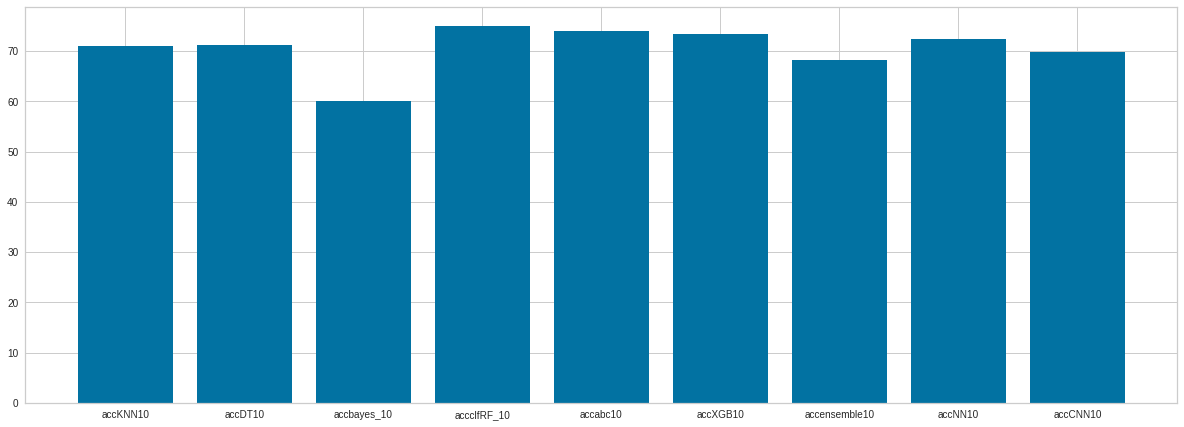

Precision


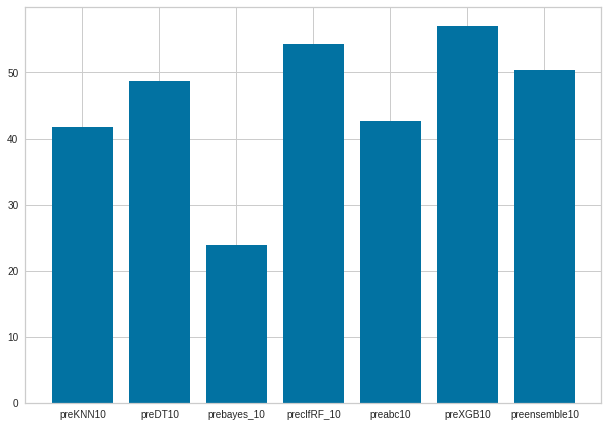

F1 Score


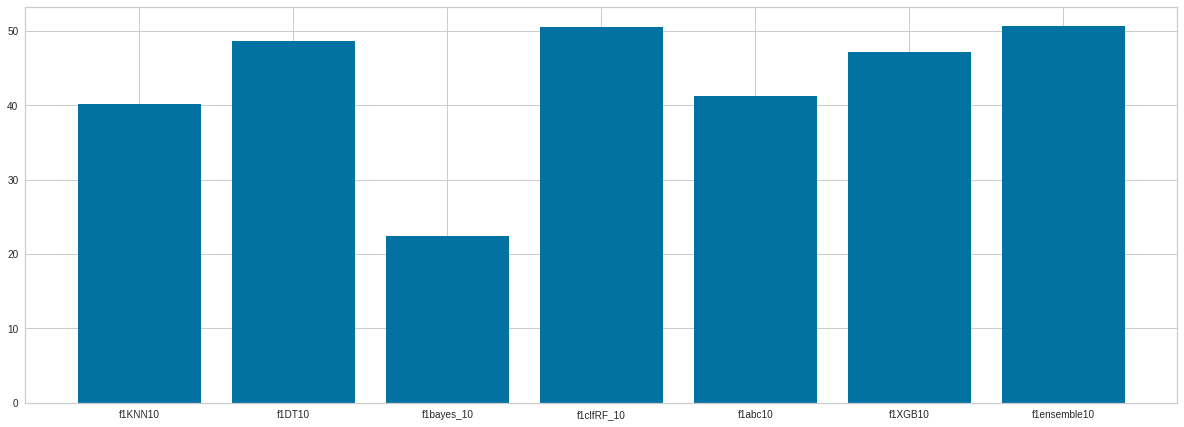

Recall


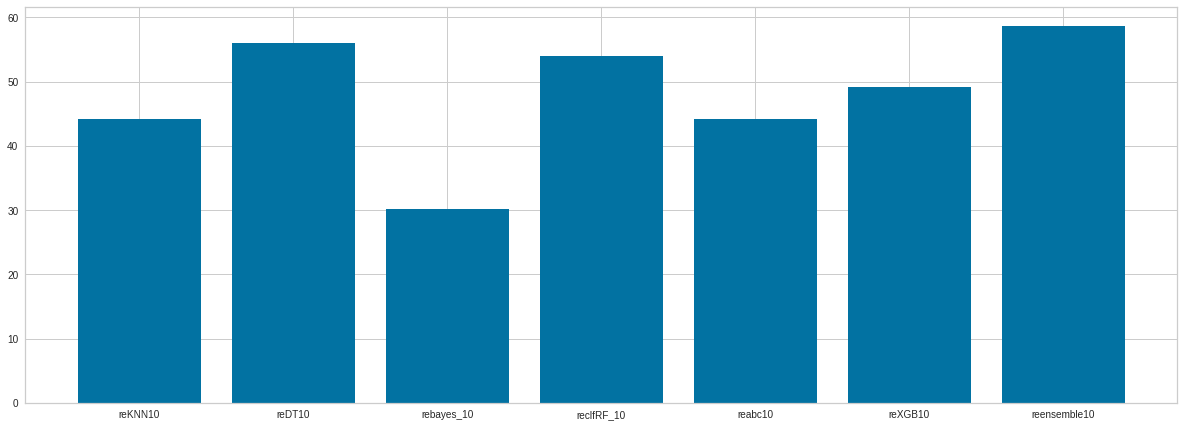

In [63]:
import matplotlib.pyplot as plt
#Accuracy
print("Accuracy")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['accKNN10', 'accDT10', 'accbayes_10', 'accclfRF_10',"accabc10","accXGB10","accensemble10","accNN10","accCNN10"]
acc = [accKNN10*100,accDT10*100,accbayes_10*100,accclfRF_10*100,accabc10*100,accXGB10*100,accensemble10*100,accNN10*100,accCNN10*100]
ax.bar(algo,acc)
plt.show()
#Precision
print("Precision")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
algo = ['preKNN10', 'preDT10', 'prebayes_10', 'preclfRF_10',"preabc10","preXGB10","preensemble10",]
pre = [preKNN10*100,preDT10*100,prebayes_10*100,preclfRF_10*100,preabc10*100,preXGB10*100,preensemble10*100]
ax.bar(algo,pre)
plt.show()
#F1 Score
print("F1 Score")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['f1KNN10', 'f1DT10', 'f1bayes_10', 'f1clfRF_10',"f1abc10","f1XGB10","f1ensemble10"]
f1 = [f1KNN10*100,f1DT10*100,f1bayes_10*100,f1clfRF_10*100,f1abc10*100,f1XGB10*100,f1ensemble10*100]
ax.bar(algo,f1)
plt.show()
#Recall
print("Recall")
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
algo = ['reKNN10', 'reDT10', 'rebayes_10', 'reclfRF_10',"reabc10","reXGB10","reensemble10"]
re = [reKNN10*100,reDT10*100,rebayes_10*100,reclfRF_10*100,reabc10*100,reXGB10*100,reensemble10*100]
ax.bar(algo,re)
plt.show()

In [ ]:
[accKNN10,preKNN10,f1KNN10,reKNN10][accDT10,preDT10,f1DT10,reDT10]
[accbayes_10,prebayes_10,f1bayes_10,rebayes_10][accclfRF_10,preclfRF_10,f1clfRF_10,reclfRF_10]
[acclogisticRegr_10,prelogisticRegr_10,f1logisticRegr_10,relogisticRegr_10]
[accabc10,preabc10,f1abc10,reabc10][accXGB10,preXGB10,f1XGB10,reXGB10]
[accensemble10,preensemble10,f1ensemble10,reensemble10]
[accNN10,historyNN10][accCNN10,historyCNN10]

